## Introduction
For every company retaining their customer is very essential to retain their customers. Retaining customer is quite more financially efficient than bringing new customer into company. The only trick is to know what are the factors that retained customer back then and try to do the same for other's as well.

### Importing Libraries

Let's import our tools and let's get our hand dirty.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Reading data

In [2]:
data=pd.read_csv("telecom_users.csv")
data.drop("Unnamed: 0",inplace=True,axis=1)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


### EDA

Checking statistical attributes of data.

In [3]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213
std,0.367909,24.516391,30.114702
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.650000
50%,0.000000,29.000000,70.400000
75%,0.000000,56.000000,89.900000
max,1.000000,72.000000,118.750000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 


#### Customer ID

It's unique identity for customer. It can be useful in many ways by keeping track on customer, it's behavior/ pattern.

In [5]:
data['customerID'].unique()

array(['7010-BRBUU', '9688-YGXVR', '9286-DOJGF', ..., '8044-BGWPI',
       '7450-NWRTR', '4795-UXVCJ'], dtype=object)

In [6]:
data['customerID'].nunique()

5986

We can see that each row is unique in the sense that each records represents unique customer.

#### Gender

Here, we can analyze gender-wise behavior of customer. We can also find out customer of which gender has good retained in our business.

In [7]:
data['gender'].unique()

array(['Male', 'Female'], dtype=object)

Values in each gender 
 Male      3050
Female    2936
Name: gender, dtype: int64


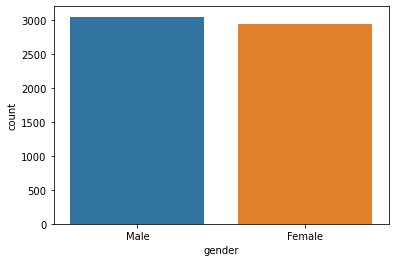

In [8]:
print("Values in each gender \n",data['gender'].value_counts())
sns.countplot(data=data,x='gender')

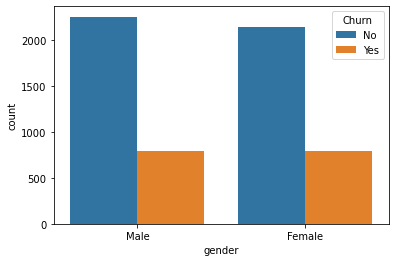

In [9]:
sns.countplot(data=data,x='gender',hue='Churn')

There is not much difference gender wise in churn rate as we can see in above plot. Both gender have nearly equal churn rate.

#### Senior Citizen

Let's see whether or not being senior citizen makes any significant difference in churn rate.

In [10]:
data['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

Senior Citizen 
 0    5020
1     966
Name: SeniorCitizen, dtype: int64


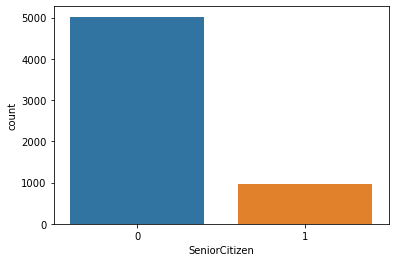

In [11]:
print("Senior Citizen \n",data['SeniorCitizen'].value_counts())
sns.countplot(data=data,x='SeniorCitizen')

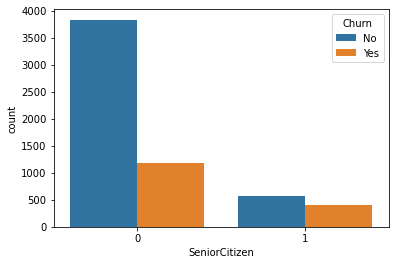

In [12]:
sns.countplot(data=data,x='SeniorCitizen',hue='Churn')

Since number of Senior citizen is significant lower than the rest of population, they both have near about churning rate.<br/>Meaning Senior Citizen does not have that much significance.

#### Partner

Let's check whether having a partner into subscription have any significance in churn rate.

In [13]:
data['Partner'].unique()

array(['Yes', 'No'], dtype=object)

Partner 
 No     3082
Yes    2904
Name: Partner, dtype: int64


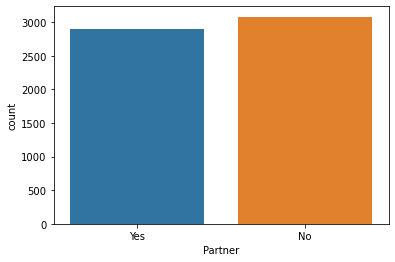

In [14]:
print("Partner \n",data['Partner'].value_counts())
sns.countplot(data=data,x='Partner')

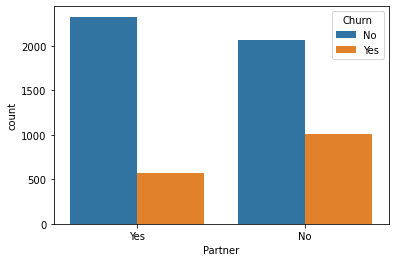

In [15]:
sns.countplot(data=data,x='Partner',hue='Churn')

Having a partner does affect the churn rate. As we can see customer with and without partner have minor difference. Still the Churn rate of customer having Partner is low.<br/>
**Partner affects churn rate**

#### Dependents

Let's have a look if having a dependent can affect churn rate or not.

In [16]:
data['Dependents'].unique()

array(['Yes', 'No'], dtype=object)

Dependents
 No     4195
Yes    1791
Name: Dependents, dtype: int64


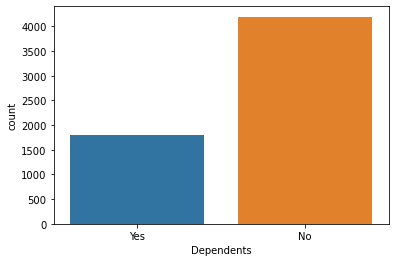

In [17]:
print("Dependents\n",data['Dependents'].value_counts())
sns.countplot(data=data,x='Dependents')

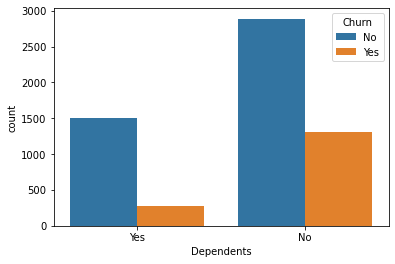

In [18]:
sns.countplot(data=data,x='Dependents',hue='Churn')

Despite of having huge difference, proportion of churn rate is low in case of people having dependents.

#### Tenure

Tenure shows for how much duration a customer is with company. Let's try to find whether tenure affects the churn rate.

In [19]:
data['tenure'].unique()

array([72, 44, 38,  4,  2, 70, 33,  1, 39, 55, 52, 30, 60, 50, 32, 51, 69,
       42, 14, 62,  5, 63, 67, 40, 65, 16, 46, 11, 49, 68, 10, 53, 54, 15,
        3, 71,  8, 64, 57, 20, 26, 31,  7, 35,  6, 13, 23,  9, 45, 17, 34,
       58, 12, 25, 28, 29, 43, 19, 41, 37, 27, 22, 24, 18, 56, 66, 59, 48,
       47, 61, 21,  0, 36], dtype=int64)

In [20]:
data['tenure'].nunique()

73

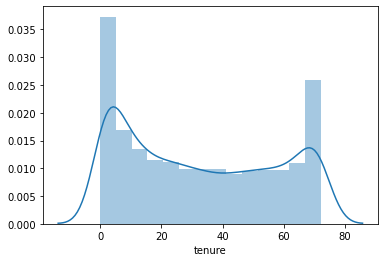

In [21]:
sns.distplot(data['tenure'])

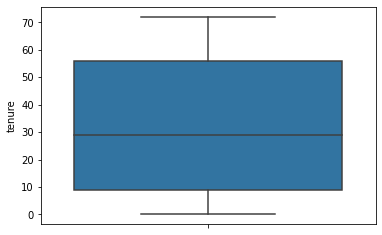

In [22]:
sns.boxplot(y=data['tenure'])

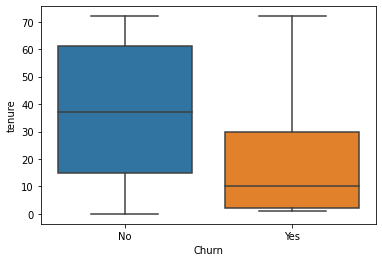

In [23]:
sns.boxplot(data=data,y='tenure',x='Churn')

Customer having churn rate are usually the one who are with subscriber for tenure less than 30 months. Tenure of customer who churned may be more than 30 months but it's in very rare or we can say few cases.

#### Phone Service

Phone Service is an attribute which states customer have phone services enabled or not. Let's see whether it has some impact on churn rate or not.

In [24]:
data['PhoneService'].unique()

array(['Yes', 'No'], dtype=object)

Phone Service Yes    5396
No      590
Name: PhoneService, dtype: int64


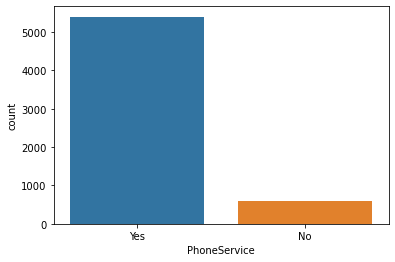

In [25]:
print("Phone Service",data['PhoneService'].value_counts())
sns.countplot(data=data,x='PhoneService')

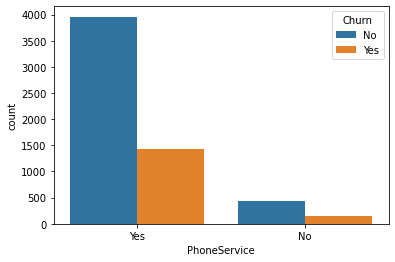

In [26]:
sns.countplot(data=data,x='PhoneService',hue='Churn')

There is drastic difference in this particular attribute.

#### Multiple Lines

Multiple Lines is an attribute which tells whether user have multiple line subscribe or not. Let's check for its impact on churn rate

In [27]:
data['MultipleLines'].unique()

array(['Yes', 'No', 'No phone service'], dtype=object)

Multiple Lines 
 No                  2848
Yes                 2548
No phone service     590
Name: MultipleLines, dtype: int64


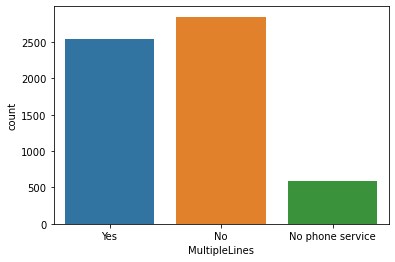

In [28]:
print("Multiple Lines \n",data['MultipleLines'].value_counts())
sns.countplot(data=data,x='MultipleLines')

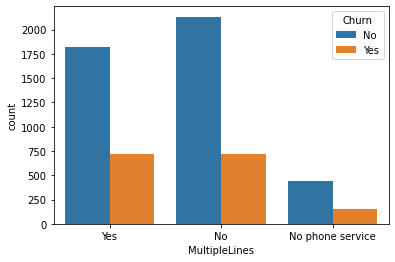

In [29]:
sns.countplot(data=data,x='MultipleLines',hue="Churn")

As we can see there is no much difference between Yes & No values but there is significant difference with customer having no Phone Service but churn rate is approx similar in terms of proportion.

#### Internet Service

Let's see if customer having internet service have impact on churn rate

In [30]:
data['InternetService'].unique()

array(['No', 'Fiber optic', 'DSL'], dtype=object)

Internet Service
 Fiber optic    2627
DSL            2068
No             1291
Name: InternetService, dtype: int64


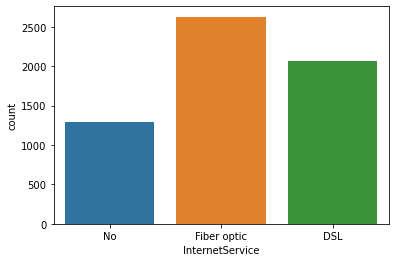

In [31]:
print("Internet Service\n",data['InternetService'].value_counts())
sns.countplot(data=data,x='InternetService')

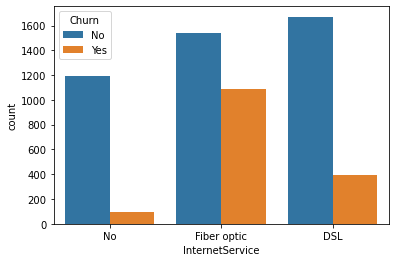

In [32]:
sns.countplot(data=data,x='InternetService',hue='Churn')

Internet Service have 3 types of values, where Fiber optic connection have highest Churn rate.

#### Online Security

Online Security tells whether it's service is online secure or not. Let's see if it affects the churn rate

In [33]:
data['OnlineSecurity'].unique()

array(['No internet service', 'No', 'Yes'], dtype=object)

Online Security
 No                     2982
Yes                    1713
No internet service    1291
Name: OnlineSecurity, dtype: int64


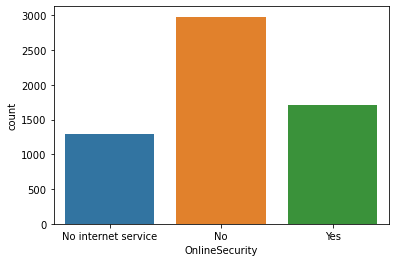

In [34]:
print("Online Security\n",data['OnlineSecurity'].value_counts())
sns.countplot(data=data,x='OnlineSecurity')

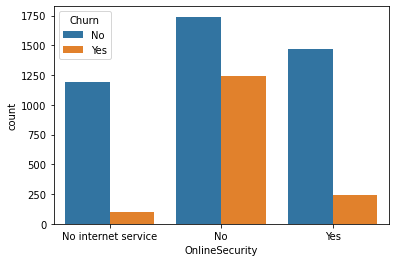

In [35]:
sns.countplot(data=data,x='OnlineSecurity',hue='Churn')

People having No Online Security tends to have higher Churn rate.

#### Online Backup

This attribute tells which customer has activated online backup service. Let's check how it impacts churn rate.

In [36]:
data['OnlineBackup'].unique()

array(['No internet service', 'Yes', 'No'], dtype=object)

Online Backup
 No                     2605
Yes                    2090
No internet service    1291
Name: OnlineBackup, dtype: int64


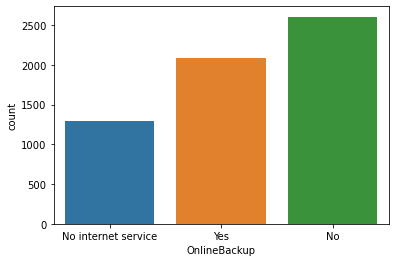

In [37]:
print("Online Backup\n",data['OnlineBackup'].value_counts())
sns.countplot(data['OnlineBackup'])

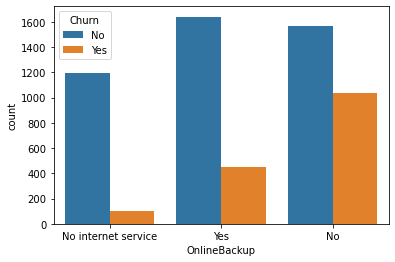

In [38]:
sns.countplot(data=data,x='OnlineBackup',hue='Churn')

Among all, customer with No online backup have highest churn rate

#### Device Protection

Device Protection tells whether customer has it's device insured or not. Let's check if it affects Churn

In [39]:
data['DeviceProtection'].unique()

array(['No internet service', 'Yes', 'No'], dtype=object)

Device Protection
 No                     2640
Yes                    2055
No internet service    1291
Name: DeviceProtection, dtype: int64


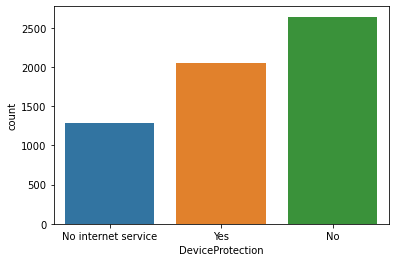

In [40]:
print("Device Protection\n",data['DeviceProtection'].value_counts())
sns.countplot(data['DeviceProtection'])

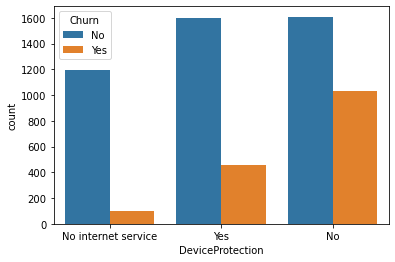

In [41]:
sns.countplot(data=data,x='DeviceProtection',hue="Churn")

Among all values, Customer with No Device Protection have higher churn rate

#### Tech Support

It tells that whether a customer is connected with tech support activity

In [42]:
data['TechSupport'].unique()

array(['No internet service', 'No', 'Yes'], dtype=object)

Tech Support
 No                     2960
Yes                    1735
No internet service    1291
Name: TechSupport, dtype: int64


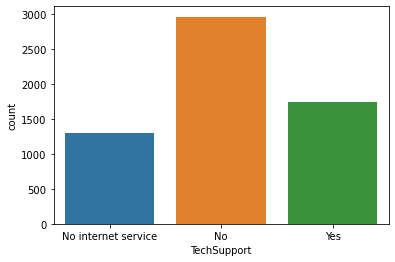

In [43]:
print("Tech Support\n",data["TechSupport"].value_counts())
sns.countplot(data=data,x='TechSupport')

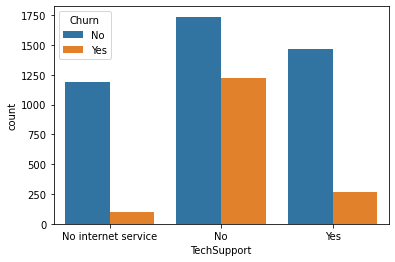

In [44]:
sns.countplot(data=data,x='TechSupport',hue="Churn")

Customer having No Tech Support tends to have higher churn rate

#### Streaming TV

This attribute tells whether customer have enabled TV streaming feature. Let's see how it affects churn rate

In [45]:
data["StreamingTV"].unique()

array(['No internet service', 'Yes', 'No'], dtype=object)

Streaming TV 
 No                     2389
Yes                    2306
No internet service    1291
Name: StreamingTV, dtype: int64


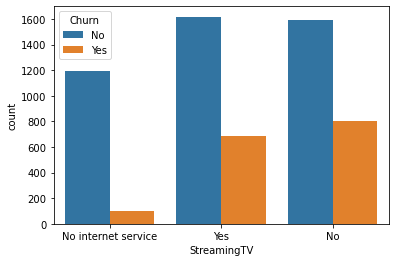

In [46]:
print("Streaming TV \n",data['StreamingTV'].value_counts())
sns.countplot(data=data,x="StreamingTV",hue="Churn")

There is slight difference in churn rate with customer having Streaming TV service. Provided they have internet connection

#### Streaming Movie

It tells which customer has opt for Streaming online movie options. Let's see it's impact on churn rate

In [47]:
data['StreamingMovies'].unique()

array(['No internet service', 'No', 'Yes'], dtype=object)

Streaming Movie
 No                     2356
Yes                    2339
No internet service    1291
Name: StreamingMovies, dtype: int64


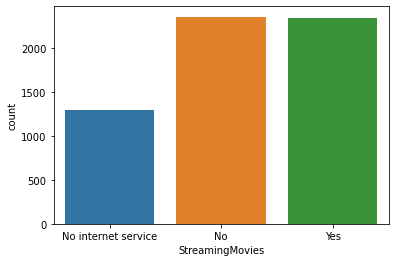

In [48]:
print("Streaming Movie\n",data['StreamingMovies'].value_counts())
sns.countplot(data=data,x='StreamingMovies')

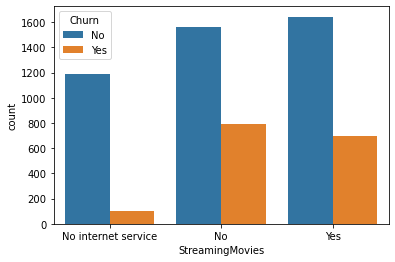

In [49]:
sns.countplot(data=data,x='StreamingMovies',hue='Churn')

Provided that customer have active net plan, Streaming Movies not that much difference but still customer having No Streaming Movies subscription tends to have higher churn rate

#### Contract

It specifies type of contract customer have with company (billing cycle). Let's observe whether it has impact on churn rate or not

In [50]:
data['Contract'].unique()

array(['Two year', 'Month-to-month', 'One year'], dtype=object)

Contract
 Month-to-month    3269
Two year          1441
One year          1276
Name: Contract, dtype: int64


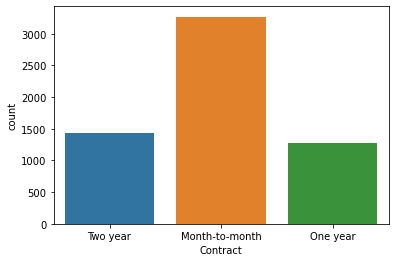

In [51]:
print("Contract\n",data["Contract"].value_counts())
sns.countplot(data=data,x="Contract")

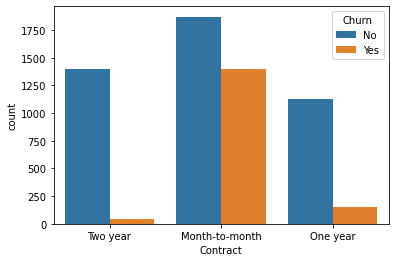

In [52]:
sns.countplot(data=data,x="Contract",hue="Churn")

Since, majority of customer have month-to-month subscription they tend to have churn rate higher than others as they can discontinue service after any month of getting service.

#### Paperless Bill

This tells whether customer gets bill in printed form or via message or some other route

In [53]:
data['PaperlessBilling'].unique()

array(['No', 'Yes'], dtype=object)

Paperless Billing
 Yes    3528
No     2458
Name: PaperlessBilling, dtype: int64


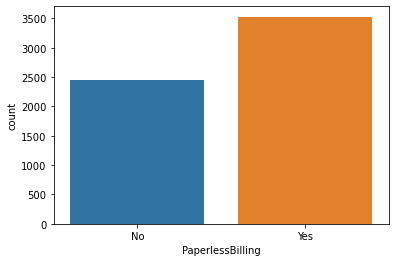

In [54]:
print("Paperless Billing\n",data["PaperlessBilling"].value_counts())
sns.countplot(data=data,x="PaperlessBilling")

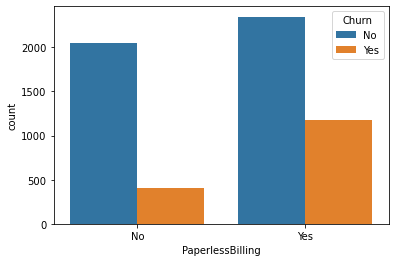

In [55]:
sns.countplot(data=data,x='PaperlessBilling',hue="Churn")

Customer having paperless bill have higher churn rate

#### Payment Method

Let's see how payment method affects churn rate

In [56]:
data['PaymentMethod'].unique()

array(['Credit card (automatic)', 'Bank transfer (automatic)',
       'Electronic check', 'Mailed check'], dtype=object)

Payment Method 
 Electronic check             2006
Mailed check                 1369
Bank transfer (automatic)    1308
Credit card (automatic)      1303
Name: PaymentMethod, dtype: int64


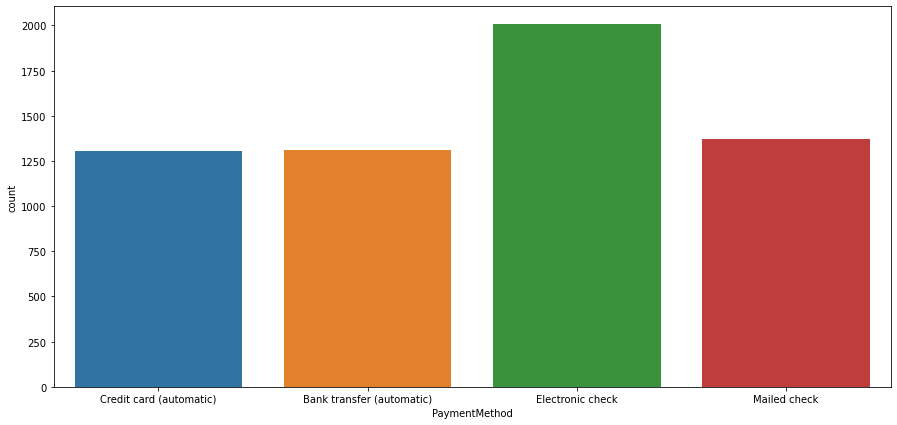

In [57]:
print("Payment Method \n",data["PaymentMethod"].value_counts())
plt.figure(figsize=(15,7))
sns.countplot(data=data,x='PaymentMethod')

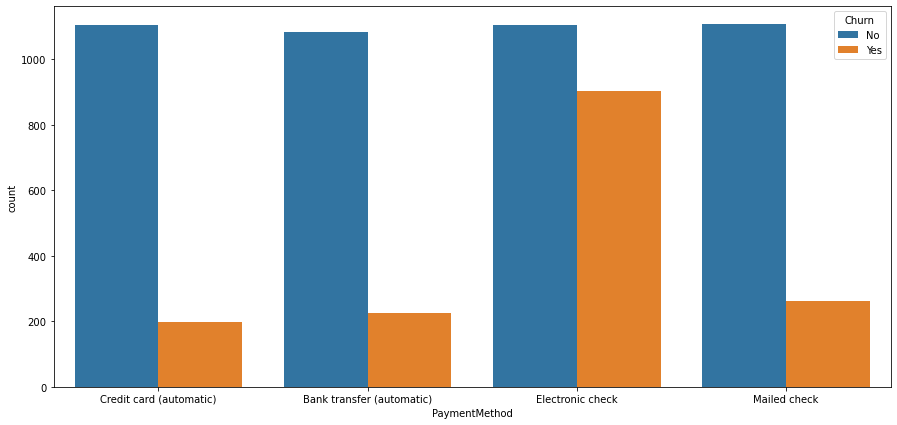

In [58]:
plt.figure(figsize=(15,7))
sns.countplot(data=data,x='PaymentMethod',hue="Churn")

Customer having Electronic Check as their payment method have higher churn rate.

#### Monthly Charges

Let's see how monthly charges affects churn rate

In [59]:
data['MonthlyCharges'].nunique()

1526

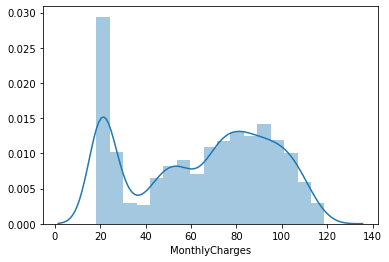

In [60]:
sns.distplot(data["MonthlyCharges"])

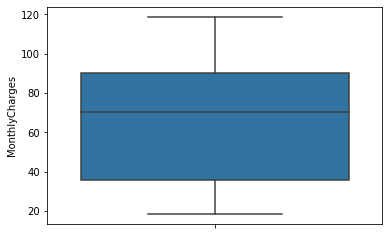

In [61]:
sns.boxplot(data=data,y='MonthlyCharges')

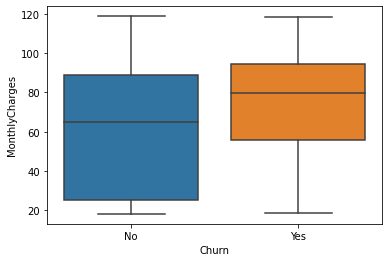

In [62]:
sns.boxplot(data=data,y="MonthlyCharges",x="Churn")

Customer with churn rate has higher monthly charges compared to those who does not have churn rate

#### Total Charges

Annual charges for customer. Let's check it's impact on churn rate

In [63]:
data["TotalCharges"].nunique()

5611

In [64]:
data["TotalCharges"]=data["TotalCharges"].str.replace(" ",str(0))
data['TotalCharges']=data['TotalCharges'].astype(float)

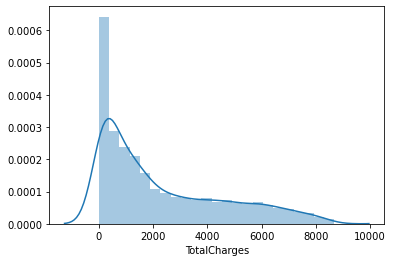

In [65]:
sns.distplot(data["TotalCharges"])

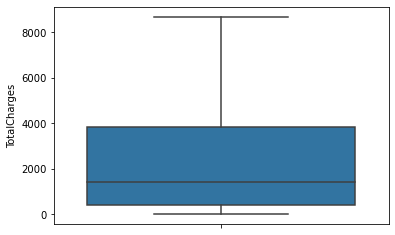

In [66]:
sns.boxplot(data=data,y="TotalCharges")

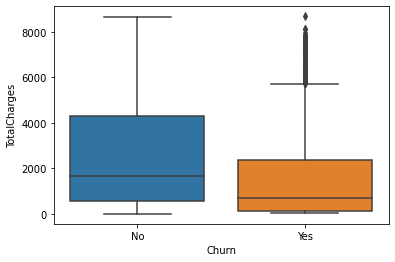

In [67]:
sns.boxplot(data=data,y="TotalCharges",x="Churn")

Customer having churn rate have usually lower annual charges

#### Churn

This is our target attribute. Churn means discontinuation of subscription.

In [68]:
data['Churn'].unique()

array(['No', 'Yes'], dtype=object)

Churn 
 No     4399
Yes    1587
Name: Churn, dtype: int64


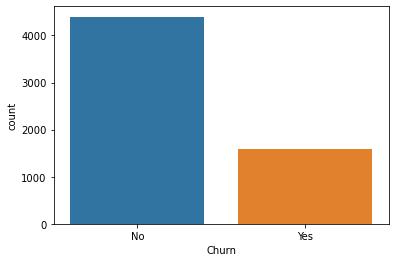

In [69]:
print("Churn \n",data["Churn"].value_counts())
sns.countplot(data['Churn'])

Our dataset is kind of imbalanced, where customer having churn rate is less than people who have no churn rate

### Data Cleaning

By seeing above EDA there is only thing to be taken care of. That is Total Charges where value of Churn is Yes.

#### Outlier removal

In [70]:
len1=len(data)
len2=0
while len1!=len2:
    q1=data[data['Churn']=="Yes"]["TotalCharges"].describe()[4]
    q3=data[data['Churn']=="Yes"]["TotalCharges"].describe()[6]
    iqr=q3-q1
    up=q3+iqr*1.5
    low=q1-iqr*1.5
    data.loc[data[data['Churn']=="Yes"]["TotalCharges"].index,"TotalCharges"]=data[(data['Churn']=="Yes")&(data["TotalCharges"]<up)&(data["TotalCharges"]>low)]["TotalCharges"]
    data.dropna(inplace=True)
    len2=len1
    len1=len(data)

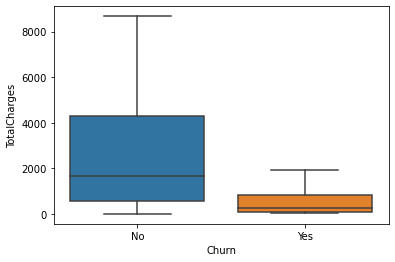

In [71]:
sns.boxplot(data=data,y="TotalCharges",x="Churn")

### Feature Selection

In [72]:
cols=[i for i in data.columns if data[i].dtypes==object][1:]

In [73]:
encoder={}
for col in cols:
    temp_dict={}
    for val,ind in zip(sorted(data[col].unique()),range(data[col].nunique())):
        
        temp_dict[val]=ind
    encoder.__setitem__(col,temp_dict)

In [74]:
encoder

{'gender': {'Female': 0, 'Male': 1},
 'Partner': {'No': 0, 'Yes': 1},
 'Dependents': {'No': 0, 'Yes': 1},
 'PhoneService': {'No': 0, 'Yes': 1},
 'MultipleLines': {'No': 0, 'No phone service': 1, 'Yes': 2},
 'InternetService': {'DSL': 0, 'Fiber optic': 1, 'No': 2},
 'OnlineSecurity': {'No': 0, 'No internet service': 1, 'Yes': 2},
 'OnlineBackup': {'No': 0, 'No internet service': 1, 'Yes': 2},
 'DeviceProtection': {'No': 0, 'No internet service': 1, 'Yes': 2},
 'TechSupport': {'No': 0, 'No internet service': 1, 'Yes': 2},
 'StreamingTV': {'No': 0, 'No internet service': 1, 'Yes': 2},
 'StreamingMovies': {'No': 0, 'No internet service': 1, 'Yes': 2},
 'Contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2},
 'PaperlessBilling': {'No': 0, 'Yes': 1},
 'PaymentMethod': {'Bank transfer (automatic)': 0,
  'Credit card (automatic)': 1,
  'Electronic check': 2,
  'Mailed check': 3},
 'Churn': {'No': 0, 'Yes': 1}}

In [75]:
for col in cols:
    for val in data[col].unique():
        data.loc[data[data[col]==val].index,col]=encoder[col][val]

In [76]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,1,0,1,1,72,1,2,2,1,...,1,1,1,1,2,0,1,24.10,1734.65,0
1,9688-YGXVR,0,0,0,0,44,1,0,1,0,...,2,0,2,0,0,1,1,88.15,3973.20,0
3,6994-KERXL,1,0,0,0,4,1,0,0,0,...,0,0,0,2,0,1,2,55.90,238.50,0
4,2181-UAESM,1,0,0,0,2,1,0,0,2,...,2,0,0,0,0,0,2,53.45,119.50,0
5,4312-GVYNH,0,0,1,0,70,0,1,0,2,...,2,2,0,2,2,1,0,49.85,3370.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0684-AOSIH,1,0,1,0,1,1,0,1,2,...,0,0,2,2,0,1,2,95.00,95.00,1
5982,5982-PSMKW,0,0,1,1,23,1,2,0,2,...,2,2,2,2,2,1,1,91.10,2198.30,0
5983,8044-BGWPI,1,0,1,1,12,1,0,2,1,...,1,1,1,1,0,1,2,21.15,306.05,0
5984,7450-NWRTR,1,1,0,0,12,1,2,1,0,...,2,0,2,2,0,1,2,99.45,1200.15,1


In [79]:
data=data[data.columns[1:]]

In [80]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,2,2,1,1,1,1,1,1,2,0,1,24.10,1734.65,0
1,0,0,0,0,44,1,0,1,0,2,2,0,2,0,0,1,1,88.15,3973.20,0
3,1,0,0,0,4,1,0,0,0,0,0,0,0,2,0,1,2,55.90,238.50,0
4,1,0,0,0,2,1,0,0,2,0,2,0,0,0,0,0,2,53.45,119.50,0
5,0,0,1,0,70,0,1,0,2,0,2,2,0,2,2,1,0,49.85,3370.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,1,0,1,0,1,1,0,1,2,0,0,0,2,2,0,1,2,95.00,95.00,1
5982,0,0,1,1,23,1,2,0,2,2,2,2,2,2,2,1,1,91.10,2198.30,0
5983,1,0,1,1,12,1,0,2,1,1,1,1,1,1,0,1,2,21.15,306.05,0
5984,1,1,0,0,12,1,2,1,0,0,2,0,2,2,0,1,2,99.45,1200.15,1


#### Correlation matrix

In [90]:
data=data.astype(int)

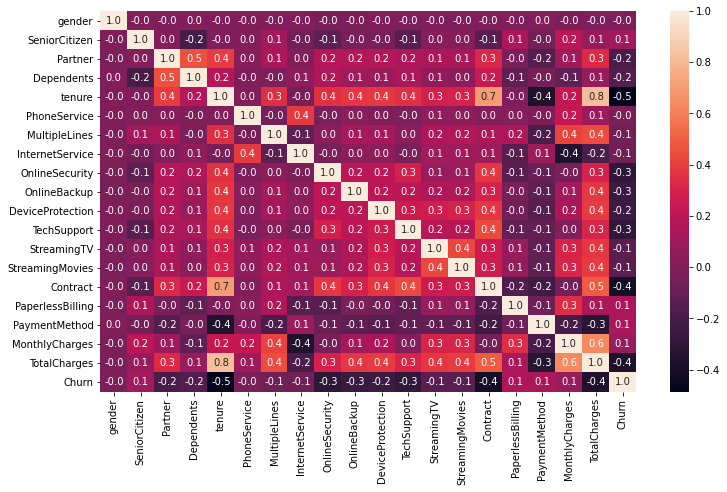

In [92]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),annot=True,fmt=".1f")

By looking at this co-relation matrix we can see that Tenure, Online Security,  Online Backup, Tech Support, Contract, Total Charges are negatively related to churn rate.

#### Select K Best

Let's find best features using SelectKBest

In [97]:
from sklearn.feature_selection import SelectKBest, f_classif
classifier = SelectKBest(score_func=f_classif,k=5)

In [98]:
fits = classifier.fit(data.drop('Churn',axis=1),data['Churn'])
x=pd.DataFrame(fits.scores_)
columns = pd.DataFrame(data.drop('Churn',axis=1).columns)
fscores = pd.concat([columns,x],axis=1)
fscores.columns = ['Attribute','Score']
fscores.sort_values(by='Score',ascending=False)

,Attribute,Score
4,tenure,1702.933960
14,Contract,1113.941406
18,TotalCharges,862.310486
8,OnlineSecurity,559.815125
11,TechSupport,513.311707
9,OnlineBackup,389.653503
10,DeviceProtection,347.716217
2,Partner,228.163040
3,Dependents,148.029877
15,PaperlessBilling,122.130203


In [143]:
cols=fscores[fscores["Score"]>500]["Attribute"].values
data[cols]

,tenure,OnlineSecurity,TechSupport,Contract,TotalCharges
0,72,1,1,2,1734
1,44,0,0,0,3973
3,4,0,0,0,238
4,2,2,0,0,119
5,70,2,2,2,3370
...,...,...,...,...,...
5981,1,2,0,0,95
5982,23,2,2,2,2198
5983,12,1,1,0,306
5984,12,0,0,0,1200


Let's take features into consideration who have score >500

### Data Balancing
<br/>
Since our dataset is imbalanced let's balance it using SMOTE.

In [157]:
from imblearn.over_sampling import SMOTE

In [158]:
over = SMOTE()

### Modeling

Let's create a classification algorithm

#### Spliting data into train and split

In [144]:
from sklearn.model_selection import train_test_split

In [201]:
train_x,test_x,train_y,test_y=train_test_split(data[cols],data['Churn'],test_size=0.17,random_state=101)

In [202]:
# train_x,train_y=over.fit_sample(train_x,train_y)

#### Logistic Regression

Since, it's binary classification we can use Logistic Regression for our classification

In [203]:
from sklearn.linear_model import LogisticRegression

In [217]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score

In [226]:
lr=LogisticRegression()
lr.fit(train_x,train_y)
predict=lr.predict(test_x)
print("Accuracy Score ",accuracy_score(predict,test_y)*100)
print("Confusion Matrix\n",confusion_matrix(predict,test_y))
print("Classification Report\n",classification_report(predict,test_y))
print("ROC AUC Curve ",roc_auc_score(predict,test_y))

Accuracy Score  85.19701810436635
Confusion Matrix
 [[699  89]
 [ 50 101]]
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       788
           1       0.53      0.67      0.59       151

    accuracy                           0.85       939
   macro avg       0.73      0.78      0.75       939
weighted avg       0.87      0.85      0.86       939

ROC AUC Curve  0.7779650048744412


#### Random Forest

In [206]:
from sklearn.ensemble import RandomForestClassifier

In [219]:
rfc=RandomForestClassifier(n_estimators=10000,random_state=101,max_depth=7,n_jobs=-1)
rfc.fit(train_x,train_y)
predict=rfc.predict(test_x)
print("Accuracy Score ",accuracy_score(predict,test_y)*100)
print("Confusion Matrix\n",confusion_matrix(predict,test_y))
print("Classification Report\n",classification_report(predict,test_y))
print("ROC AUC Curve ",roc_auc_score(predict,test_y))

Accuracy Score  84.98402555910543
Confusion Matrix
 [[680  72]
 [ 69 118]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.90      0.91       752
           1       0.62      0.63      0.63       187

    accuracy                           0.85       939
   macro avg       0.76      0.77      0.77       939
weighted avg       0.85      0.85      0.85       939

ROC AUC Curve  0.7676356809648424


#### XGBOOST

In [208]:
from xgboost import XGBClassifier

In [220]:
xgc=XGBClassifier(max_depth=5,learining_rate=0.02,n_estimators=10)
xgc.fit(train_x,train_y)
predict=xgc.predict(test_x)
print("Accuracy Score ",accuracy_score(predict,test_y)*100)
print("Confusion Matrix\n",confusion_matrix(predict,test_y))
print("Classification Report\n",classification_report(predict,test_y))
print("ROC AUC Curve ",roc_auc_score(predict,test_y))

Accuracy Score  85.19701810436635
Confusion Matrix
 [[686  76]
 [ 63 114]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       762
           1       0.60      0.64      0.62       177

    accuracy                           0.85       939
   macro avg       0.76      0.77      0.76       939
weighted avg       0.86      0.85      0.85       939

ROC AUC Curve  0.7721651319008853


#### KNN

In [210]:
from sklearn.neighbors import KNeighborsClassifier

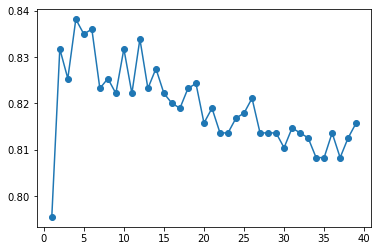

In [221]:
acc=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    predict=knn.predict(test_x)
    acc.append(accuracy_score(predict,test_y))
plt.plot(range(1,40),acc,marker="o")


In [222]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(train_x,train_y)
predict=knn.predict(test_x)
print("Accuracy Score ",accuracy_score(predict,test_y)*100)
print("Confusion Matrix\n",confusion_matrix(predict,test_y))
print("Classification Report\n",classification_report(predict,test_y))
print("ROC AUC Curve ",roc_auc_score(predict,test_y))

Accuracy Score  83.17358892438764
Confusion Matrix
 [[706 115]
 [ 43  75]]
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.86      0.90       821
           1       0.39      0.64      0.49       118

    accuracy                           0.83       939
   macro avg       0.67      0.75      0.69       939
weighted avg       0.87      0.83      0.85       939

ROC AUC Curve  0.7477600693655939


### Model Selection

By keeping in mind that our business goal is to identify whether customer is going to churn or not. This makes our False Positive very important factor to be taken care of. Thus I selected Precision as my metric to evaluate model's performance. <br/>
Random Forest have higher precision. So selecting Random Forest Classifier as my final model.

### Saving model

Let's save model to use in production for prediction.

In [231]:
import pickle
file="randomforest.sav"
pickle.dump(rfc,open(file,"wb")) 

#### Saving json of categorical attributes

In [261]:
pickle.dump(encoder,open("encoding.pkl","wb"))